# Filtering

## Setup

In [1]:
from graphs_2d import *

## Graph Definition

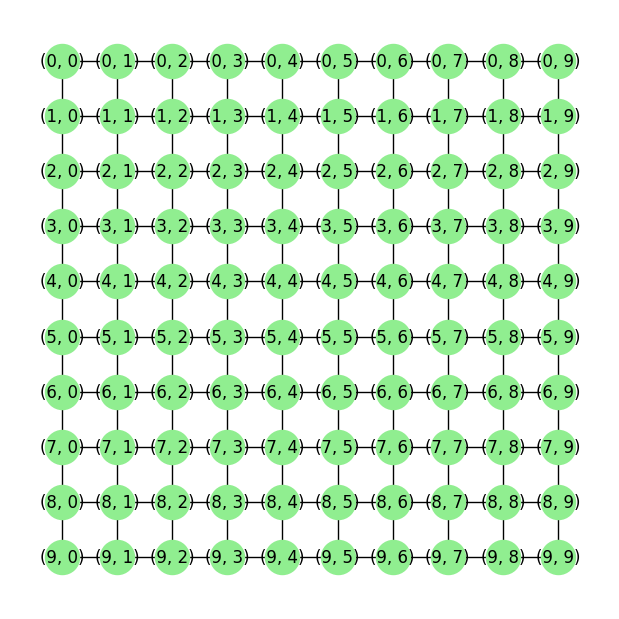

networkx.classes.graph.Graph

In [2]:
# Generate a single graph
rows, cols = 10, 10
grid_graph = generate_2D_grid_graph(rows, cols)
adjacency_matrix = nx.adjacency_matrix(grid_graph).todense()

plot_graph(grid_graph, 'grid')

type(grid_graph)

## Finding MCDS

### Filtration Algorithm

In [3]:
def mcds_filtering(G, sub_G=None):
    """Finds a connected dominating set by filtering out nodes, starting from those with least degree."""
    if sub_G is None:
        sub_G = G.copy()
    nodes = set(sub_G.nodes())
    changed = True
    while changed:
        changed = False
        # Sort nodes by degree (ascending: least degree first)
        sorted_nodes = sorted(nodes, key=lambda n: sub_G.degree[n])
        for node in sorted_nodes:
            test_set = nodes - {node}
            if len(test_set) == 0:
                continue
            if is_connected_dominating_set(G, test_set):
                nodes = test_set
                changed = True
                break  # Restart after any removal
    return nodes

### Visualize Filtration Solution

{(1, 3), (7, 1), (6, 5), (6, 8), (4, 2), (4, 5), (3, 3), (4, 8), (3, 6), (5, 3), (8, 5), (8, 8), (1, 2), (2, 7), (1, 8), (6, 4), (7, 3), (6, 7), (3, 2), (4, 1), (3, 5), (5, 2), (5, 5), (8, 4), (8, 1), (5, 8), (1, 1), (1, 4), (2, 3), (1, 7), (2, 6), (7, 2), (6, 6), (7, 5), (6, 3), (7, 8)}


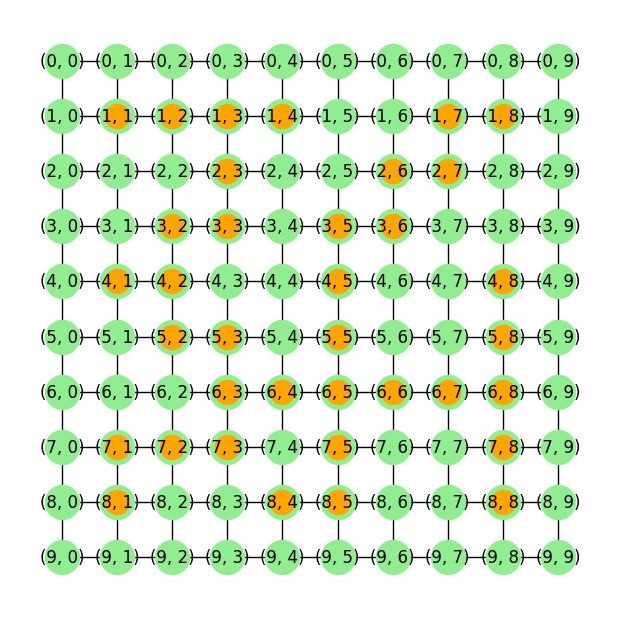

MCDS size: 36


In [4]:
mcds = mcds_filtering(grid_graph)
overlay_subset(grid_graph, mcds, 'grid')
print(f"MCDS size: {len(mcds)}")